In [79]:
#  definindo funções de matemática 

import numpy as np

def crossprod(A, B):
    C=np.zeros(3)
    C[0]=A[1]*B[2]-A[2]*B[1]
    C[1]=A[2]*B[0]-A[0]*B[2]
    C[2]=A[0]*B[1]-A[1]*B[0]
    return C 

def mod(F):
    mod=np.sqrt(F[0]*F[0]+F[1]*F[1]+F[2]*F[2])	
    return mod

# teste
A=np.array([1.0,2.0,3.0])
B=np.array([4.0,5.0,6.0])
C=crossprod(A,B)
print("Produto vetorial A x B = ",C)
print("Módulo do vetor C = ",mod(C))

Produto vetorial A x B =  [-3.  6. -3.]
Módulo do vetor C =  7.3484692283495345


In [80]:
# definindo funções de física
def FLorentz(q, v, B): # força de Lorentz
    F=np.zeros(3)
    F = q*crossprod(v, B)
    return F    

def Velocity(v0, a, t):
    v = np.zeros(3)
    vers = np.zeros(3) # versor na direção de v
    for i in range(3): 
        v[i] = v0[i] + a[i] * t

    modv = mod(v) # deve ser diferente de zero
    modv0 = mod(v0)
    for i in range(3):
        vers[i] = v[i] / modv
        v[i] = modv0 * vers[i] 
    return v

def Position(r0, v0, a, t):
    r = np.zeros(3)
    for i in range(3): 
        r[i]=r0[i]+v0[i]*t+(a[i]*t*t)/2
    return r    

def RelMass(m, v0): # massa relativística
    c = 299792458 # m/s
    beta = mod(v0) / c
    print("beta = %.3e" % beta)
    mR = m / np.sqrt(1 - beta * beta)
    print("mR = %.3e" % mR)
    return mR

def VariableB(B0, r): # campo magnético variável
    B0[0] = 0
    B0[1] = 1e-4 # Tesla 
    B0[2] = 0
    k = 1.1
    modr = mod(r)
    B = np.zeros(3)
    for i in range(3):
        B[i] = B0[i]
    if modr > 1:
        for i in range(3):
            B[i] = k * rL0 * B0[i] / modr
    return B


# teste
q=15.0
v=np.array([0.0,1.0,0.0])
B=np.array([0.0,0.0,1.0])
F=FLorentz(q, v, B)
print("Força de Lorentz F = ",F)


Força de Lorentz F =  [15.  0.  0.]


In [ ]:
# funções principais
import pandas as pd

e=1.6E-19
mp=1.67E-27
u=1.66E-27
c=299792458

q=26*e
#m=mp
m=56*u
r0=[0.0,0.0,0.0]
v0=[0.7*c,0.1*c,0.1*c]
B0=[0.0,1E-4,0.0]
mR=RelMass(m,v0)
print("massa relativistica = %.3e\n" % mR)
	
modv=mod(v0)
modB=mod(B0)

rL0=mR*modv/(q*modB) #raio de Larmor
T=2*np.pi*mR/(q*modB) # periodo de giro
t=T/10000

print("%.3e,%.3e\n" % (modv,modB))
print("%.3e,%.3e,%.3e\n" % (rL0,T,t))

# loop principal

positions = []

for i in range(30000):
    B=VariableB(B0,r0)
    modB=mod(B)
    rL=mR*modv/(q*modB)
    modr=mod(r0)
    #if i>0: print("%.3e %.3e %.3e \n" % (t*i,modr,rL))
    F=FLorentz(q,v0,B)
    modF=mod(F)
    a=np.zeros(3)
    for j in range(3):
        a[j]=F[j]/mR
    v=Velocity(v0,a,t)
    r=Position(r0,v0,a,t)
    x=r[0]
    y=r[1]
    z=r[2]
    positions.append([x, y, z])
    for j in range(3):
        r0[j]=r[j]
        v0[j]=v[j]

df = pd.DataFrame(positions, columns=['x', 'y', 'z'])
print(df)    





beta = 7.141e-01
mR = 1.328e-25
massa relativistica = 1.328e-25

2.141e+08,1.000e-04

6.835e+04,2.006e-03,2.006e-07

                  x             y             z
0         42.090479      6.013195      6.026419
1         80.857257     12.026390     35.214779
2         95.436762     16.093190     76.971960
3         91.897153     19.689010    120.393440
4         74.592671     23.049597    160.107091
...             ...           ...           ...
29995  43966.707892  24164.220005 -28621.462780
29996  43991.476772  24164.995271 -28586.391619
29997  44016.216962  24165.770537 -28551.300214
29998  44040.928447  24166.545802 -28516.188588
29999  44065.611210  24167.321068 -28481.056766

[30000 rows x 3 columns]


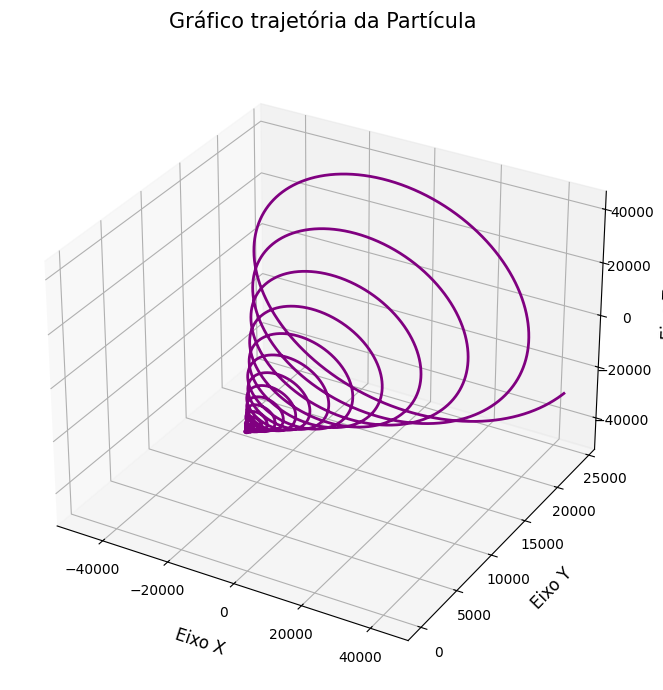

In [82]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection='3d', facecolor='white')
ax.plot3D(df['x'], df['y'], df['z'], color='purple', linewidth=2)
ax.set_xlabel('Eixo X', fontsize=12, labelpad=10)
ax.set_ylabel('Eixo Y', fontsize=12, labelpad=10)
ax.set_zlabel('Eixo Z', fontsize=12, labelpad=10)
ax.set_title('Gráfico trajetória da Partícula', fontsize=15, pad=20)
ax.grid(True)
plt.tight_layout()
plt.show()

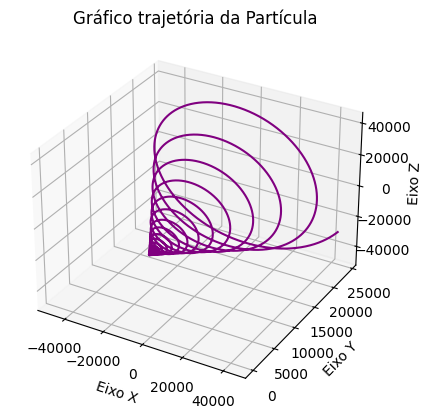

In [83]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(df['x'], df['y'], df['z'], 'purple')
ax.set_xlabel('Eixo X')
ax.set_ylabel('Eixo Y')
ax.set_zlabel('Eixo Z')
ax.set_title('Gráfico trajetória da Partícula')
plt.show()